### Q1


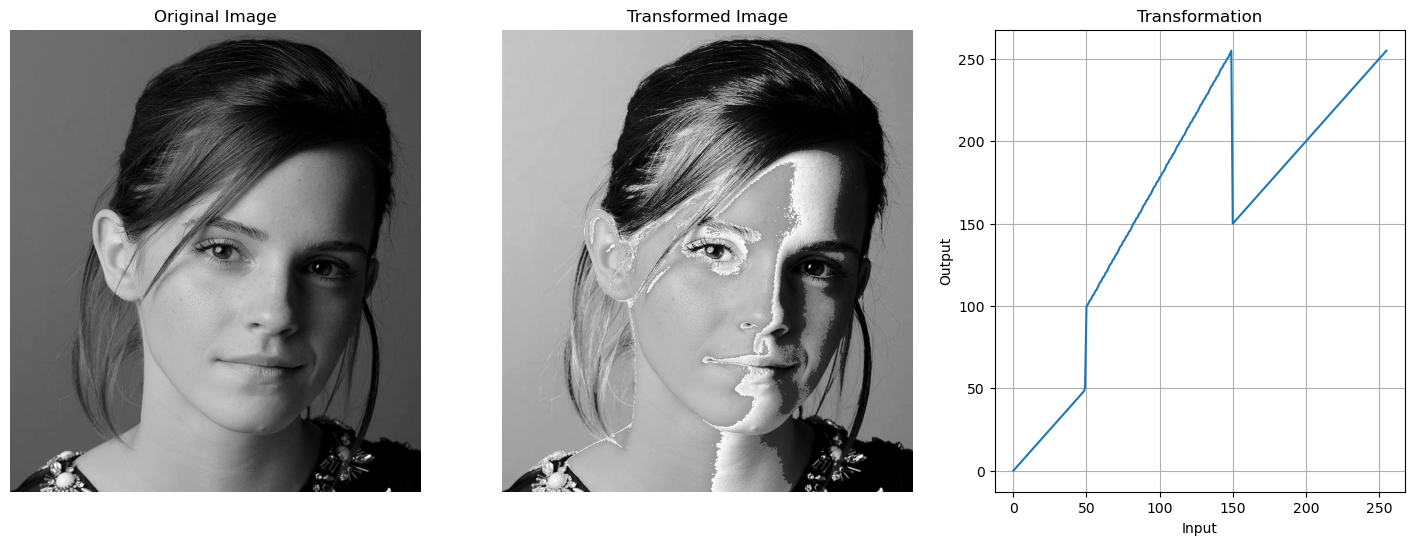

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

control_points = np.array([[50, 50], [50, 100], [150, 255], [150, 150]], dtype=np.uint8)

t1 = np.linspace(0, control_points[0, 1], control_points[0, 0] - 0).astype(np.uint8)
t2 = np.linspace(control_points[1, 1], control_points[2, 1], control_points[2, 0] - control_points[1, 0]).astype(np.uint8)
t3 = np.linspace(control_points[3, 1], 255, 255 - control_points[3, 0] + 1).astype(np.uint8)

transform = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
# print(len(transform))

transformed_image = cv.LUT(image, transform)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Transformed Image')
axs[1].axis('off')

axs[2].plot(transform)
axs[2].set_title('Transformation')
axs[2].set_xlabel('Input')
axs[2].set_ylabel('Output')
axs[2].grid()



[]


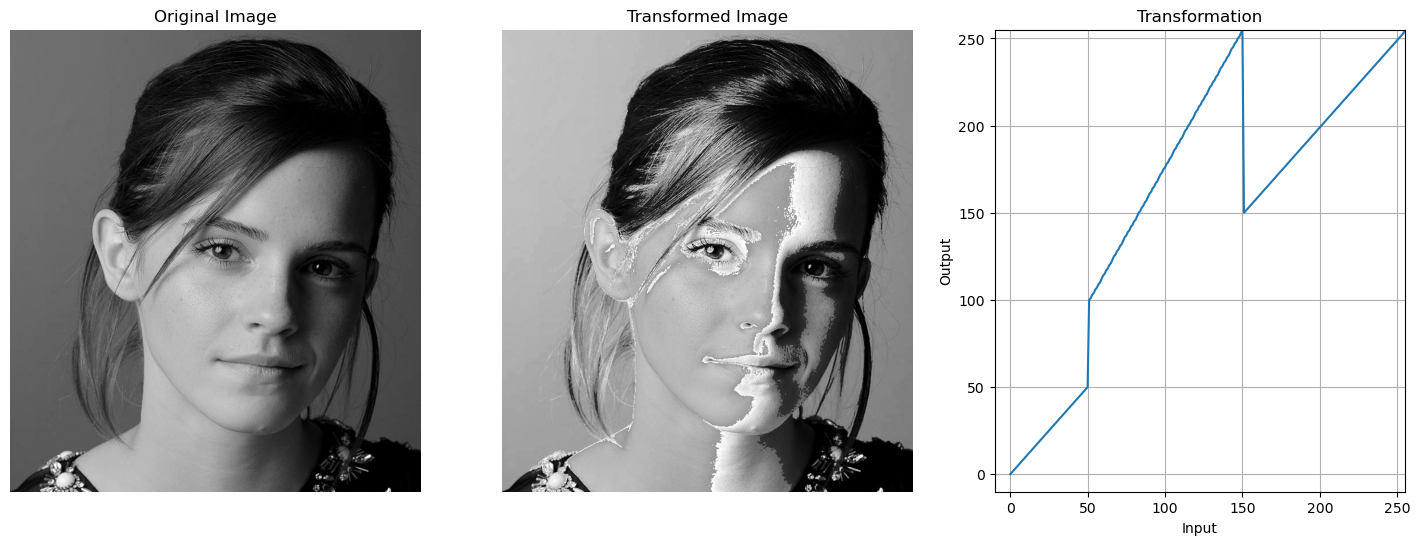

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

points = np.array([[0, 0], [50, 50], [50, 100], [150, 255], [150, 150], [255, 255]], dtype=np.uint8)

# t1 = np.linspace(points[0, 1], points[1, 1], points[1, 0] - points[0, 0] + 1).astype(np.uint8)
# t2 = np.linspace(points[1, 1], points[2, 1], points[2, 0] - points[1, 0]).astype(np.uint8)
# t3 = np.linspace(points[2, 1], points[3, 1], points[3, 0] - points[2, 0]).astype(np.uint8)
# t4 = np.linspace(points[3, 1], points[4, 1], points[4, 0] - points[3, 0]).astype(np.uint8)
# t5 = np.linspace(points[4, 1], points[5, 1], points[5, 0] - points[4, 0]).astype(np.uint8)
# print(len(t1), len(t2), len(t3), len(t4), len(t5))

# transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype(np.uint8)
# print(len(transform))
transform = np.array([], dtype=np.uint8)
print(transform)

for i in range(len(points) - 1):
    if i == 0:
        transform = np.concatenate((transform, np.linspace(points[i, 1], points[i+1, 1], points[i+1, 0] - points[i, 0] + 1).astype(np.uint8)), axis=0)
        
    else:
        transform = np.concatenate((transform, np.linspace(points[i, 1], points[i+1, 1], points[i+1, 0] - points[i, 0]).astype(np.uint8)), axis=0)

transformed_image = cv.LUT(image, transform)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Transformed Image')
axs[1].axis('off')

axs[2].plot(transform)
axs[2].set_title('Transformation')
axs[2].set_xlabel('Input')
axs[2].set_ylabel('Output')
axs[2].grid()

### Q2

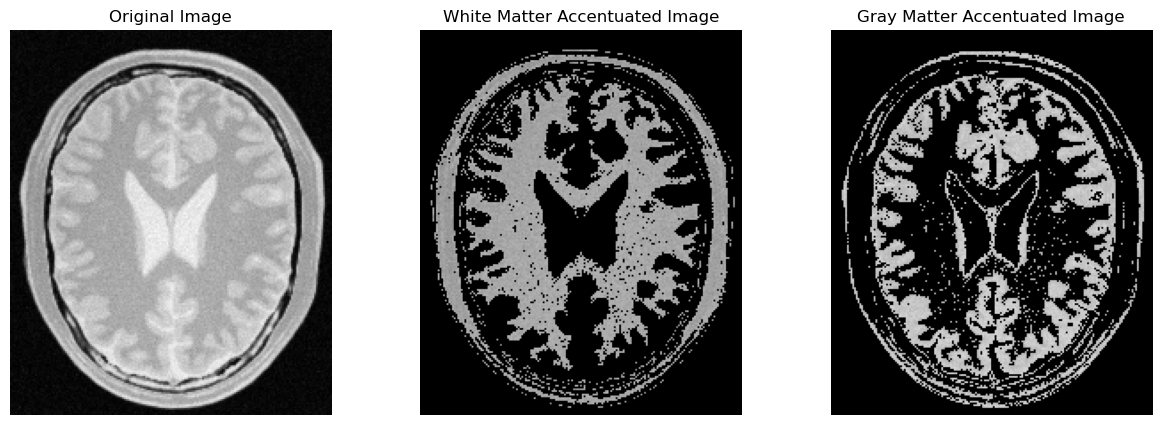

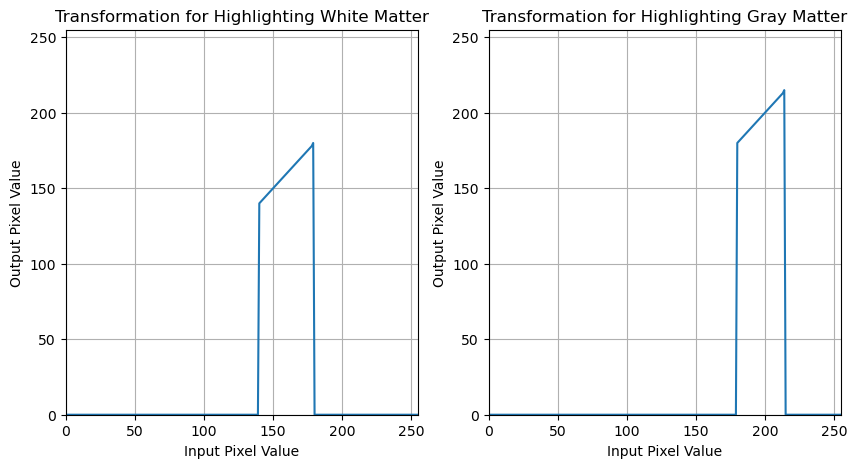

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# White matter appear darker than gray matter in the proton density image, 
# so we have to enhance the white matter by mapping lower pixel values to higher ones and vice versa for gray matter. 
white_lower_threshold = 140
white_upper_threshold = 180
gray_lower_threshold = 180
gray_upper_threshold = 215

def create_mask(lower_threshold, upper_threshold):
    mask = np.zeros(256, dtype=np.uint8)
    mask[lower_threshold:upper_threshold] = np.linspace(lower_threshold, upper_threshold, upper_threshold - lower_threshold).astype(np.uint8)
    return mask

white_mask = create_mask(white_lower_threshold, white_upper_threshold)
gray_mask = create_mask(gray_lower_threshold, gray_upper_threshold)

white_enhanced = cv.LUT(image, white_mask)
gray_enhanced = cv.LUT(image, gray_mask)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(white_enhanced, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('White Matter Accentuated Image')
axs[1].axis('off')  

axs[2].imshow(gray_enhanced, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Gray Matter Accentuated Image')
axs[2].axis('off')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Transfromation to accentuate the white matter
axs[0].plot(white_mask)
axs[0].set_title('Transformation for Highlighting White Matter')

# Plot transformation to accentuate the gray matter
axs[1].plot(gray_mask)
axs[1].set_title('Transformation for Highlighting Gray Matter')

for ax in axs:
    ax.set_xlabel('Input Pixel Value')
    ax.set_ylabel('Output Pixel Value')
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.grid()

### Q3

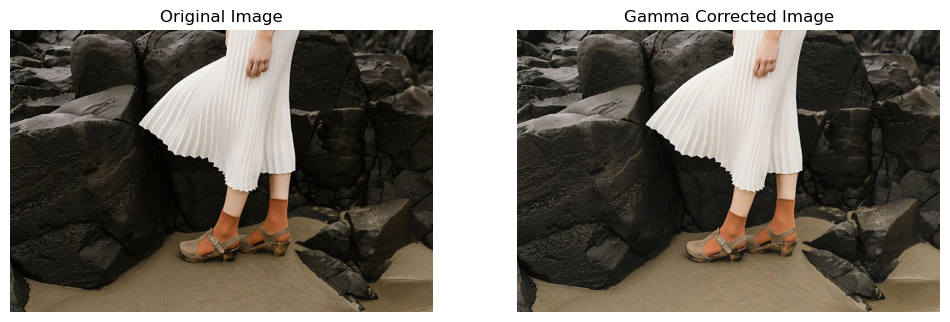

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_bgr = cv.imread("a1images/highlights_and_shadows.jpg")
# Converting the image to Lab color space
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)
# Splitting the Lab image into its channels
l_channel, a_channel, b_channel = cv.split(img_lab)
gamma = 0.8
# Normalizing the L channel, applying gamma correction and rescale
l_gamma_corrected = (np.power(l_channel / 255.0, gamma) * 255.0).astype(np.uint8)
l_gamma_corrected = np.clip(l_gamma_corrected, 0, 255).astype(np.uint8)
# Merging the channels back
img_corrected = cv.merge((l_gamma_corrected, a_channel, b_channel))
img_corrected_bgr = cv.cvtColor(img_corrected, cv.COLOR_Lab2BGR)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(img_corrected, cv.COLOR_Lab2RGB))
axs[1].set_title('Gamma Corrected Image')
axs[1].axis('off')

plt.show()

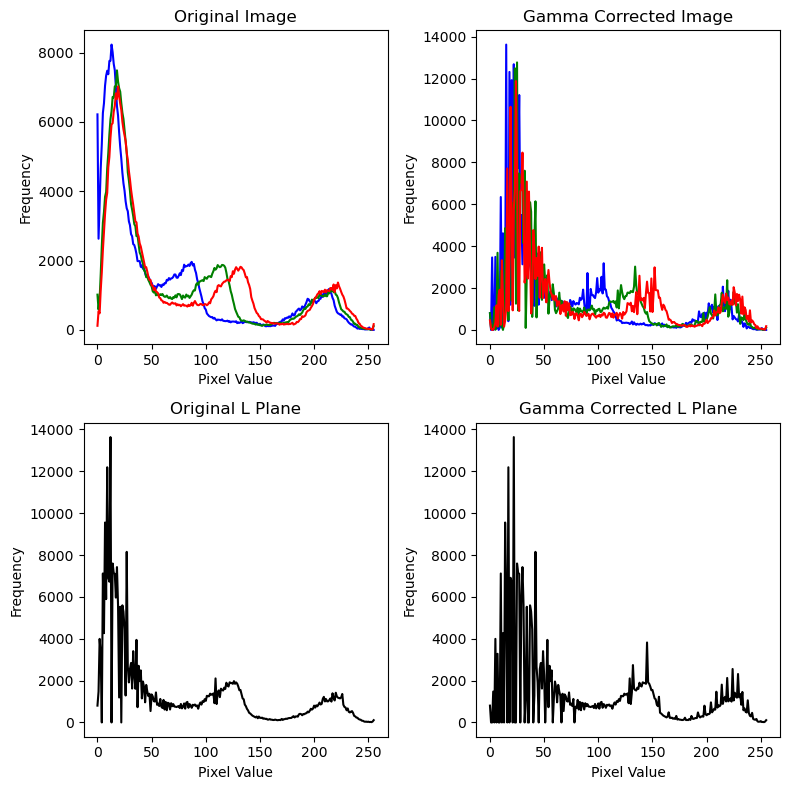

In [50]:
colors = ['b', 'g', 'r']

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i, color in enumerate(colors):
    original_hist = cv.calcHist([img_bgr], [i], None, [256], [0, 256])
    axs[0][0].plot(original_hist, color=color)
    corrected_hist = cv.calcHist([img_corrected_bgr], [i], None, [256], [0, 256])
    axs[0][1].plot(corrected_hist, color=color)

axs[0][0].set_title('Original Image')
axs[0][0].set_xlabel('Pixel Value')
axs[0][0].set_ylabel('Frequency')

axs[0][1].set_title('Gamma Corrected Image')
axs[0][1].set_xlabel('Pixel Value')
axs[0][1].set_ylabel('Frequency')

original_l_hist = cv.calcHist([l_channel], [0], None, [256], [0, 256])
axs[1][0].plot(original_l_hist, color='k')
axs[1][0].set_title('Original L Plane')
axs[1][0].set_xlabel('Pixel Value')
axs[1][0].set_ylabel('Frequency')

corrected_l_hist = cv.calcHist([l_gamma_corrected], [0], None, [256], [0, 256])
axs[1][1].plot(corrected_l_hist, color='k')
axs[1][1].set_title('Gamma Corrected L Plane')
axs[1][1].set_xlabel('Pixel Value')
axs[1][1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Q4: Vibrance Enhancement Using Intensity Transformation

**Task:**  
Increase the vibrance of a photograph by applying the following intensity transformation to the saturation plane:

$$
f(x) = \min \left( x + a \times 128 e^{- \frac{(x-128)^2}{2\sigma^2}},\ 255 \right)
$$

where $x$ is the input intensity, $a \in [0, 1]$, and $\sigma = 70$.

**Steps:**
1. Split the image shown in Fig. 4 into hue, saturation, and value planes.
2. Apply the above intensity transformation to the saturation plane.
3. Adjust $a$ to get a visually pleasing output. Report the value of $a$.
4. Recombine the three planes.
5. Display the original image, vibrance-enhanced image, and the intensity transformation

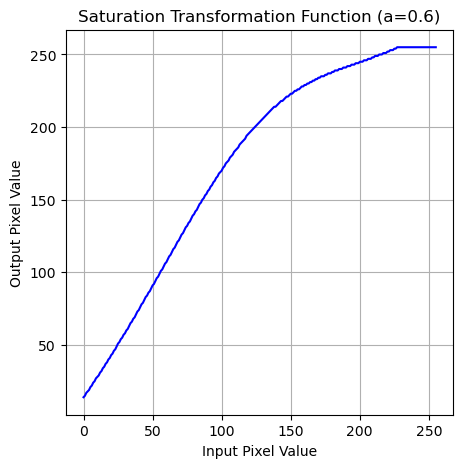

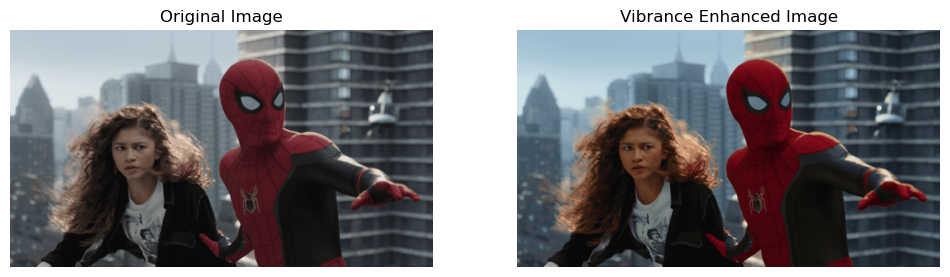

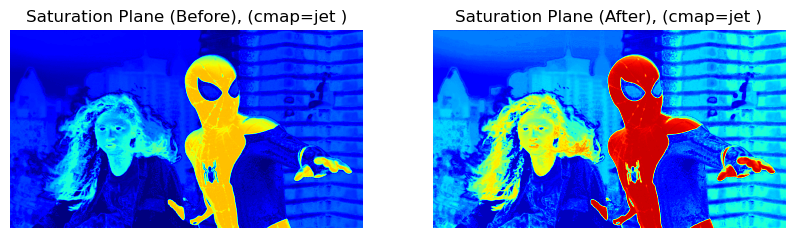

In [67]:
img_bgr = cv.imread("a1images/spider.png")
# Splitting the image into hue, saturation and value planes
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

# Applying the transformation to the saturation plane
a = 0.6
sigma = 70
x = np.arange(0, 256)
f = np.minimum(x + a*128*np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255).astype(np.uint8)
s_transformed = cv.LUT(s, f)

# Merging planes
img_transformed_hsv = cv.merge((h, s_transformed, v))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(f, color='b')
ax.set_title(f'Saturation Transformation Function (a={a})')
ax.set_xlabel('Input Pixel Value')
ax.set_ylabel('Output Pixel Value')
ax.grid()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(img_transformed_hsv, cv.COLOR_HSV2RGB))
axs[1].set_title('Vibrance Enhanced Image')
axs[1].axis('off')

# Saturation plane before and after the transformation
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

cmap = 'jet'
axs[0].imshow(s, cmap=cmap, vmin=0, vmax=255)
axs[0].set_title(f'Saturation Plane (Before), (cmap={cmap} )')
axs[0].axis('off')

axs[1].imshow(s_transformed, cmap=cmap, vmin=0, vmax=255)
axs[1].set_title(f'Saturation Plane (After), (cmap={cmap} )')
axs[1].axis('off')

plt.show()